In [ ]:
import matplotlib.pyplot as plt
import numpy as np, numpy.random as npr
import scipy.stats
npr.seed(1)

In [ ]:
def getOneDatum():
    # Generate one datapoint from the exponential distribution
    # The true distribution is ~exp(-t/1.3)
    tauTrue = 1.3
    return scipy.stats.expon(0, tauTrue).rvs()
def getData(N):
    # Generate one datapoint from the exponential distribution
    # The true distribution is ~exp(-t/1.3)
    tauTrue = 1.3
    return scipy.stats.expon(0, tauTrue).rvs(N)

def likelihood(tau, data):
    # evaluate the likelihood of the data x given tau
    # function of both: parameters and the data
    # PDF for the data for any value of parameters
    return scipy.stats.expon(0, tau).pdf(data)

xgrid = np.linspace(0.00001, 20, 1000)
# grid of taus

In [ ]:
data1 = getOneDatum() # first datapoint
print (data1)

0.701487588436941


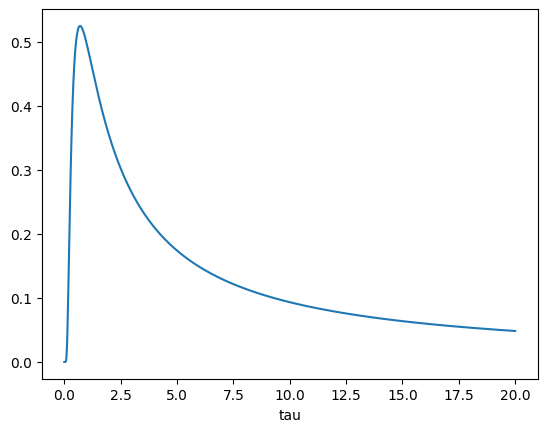

In [ ]:
plt.plot(xgrid, likelihood(xgrid,data1)) # Our information about tau after first datapoint arrived
plt.xlabel('tau');

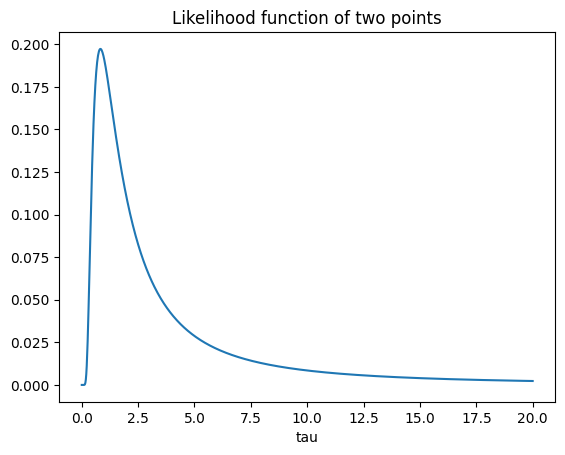

In [ ]:
def likelihoodMany(tau, data=None):
    #posterior on tau after receiving multiple data points
    post = np.ones(len(xgrid))
    for curd in data:
        post  = post * likelihood(tau, curd)
    return post

moredata = getData(2)
plt.plot(xgrid, likelihoodMany(xgrid,moredata))
plt.xlabel('tau');
plt.title('Likelihood function of two points');

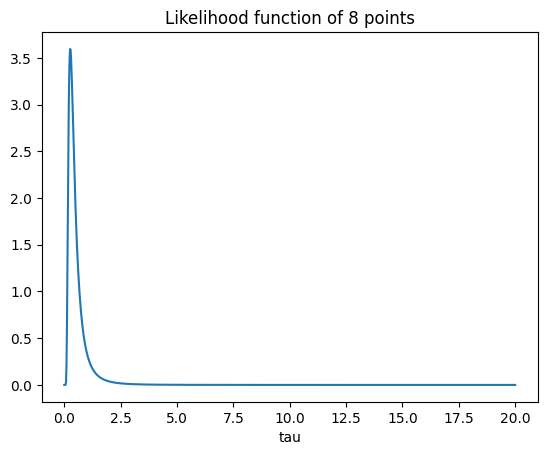

In [ ]:
moredata = getData(4)
plt.plot(xgrid,likelihoodMany(xgrid,moredata))
plt.xlabel('tau')
plt.title('Likelihood function of 4 points');

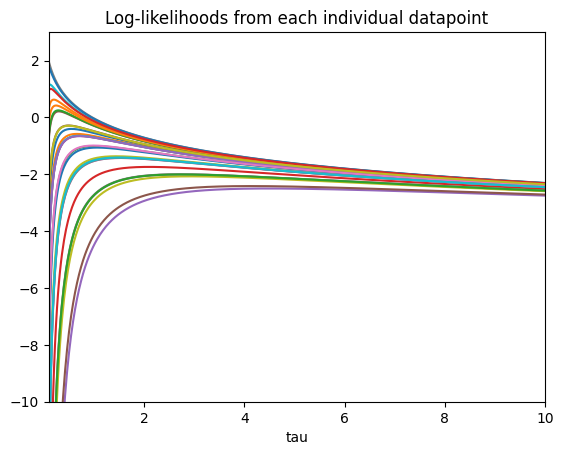

In [ ]:
likes=[]
for i in range(30):
    curlike = np.log(np.maximum(likelihood(xgrid,getOneDatum()),1e-30))
    likes.append(curlike)
    plt.plot(xgrid,curlike)
plt.ylim(-10,3)
plt.xlim(1e-1,10)
plt.title('Log-likelihoods from each individual datapoint')
plt.xlabel('tau');

Text(0.5, 1.0, 'log-likelihood of 30 points')

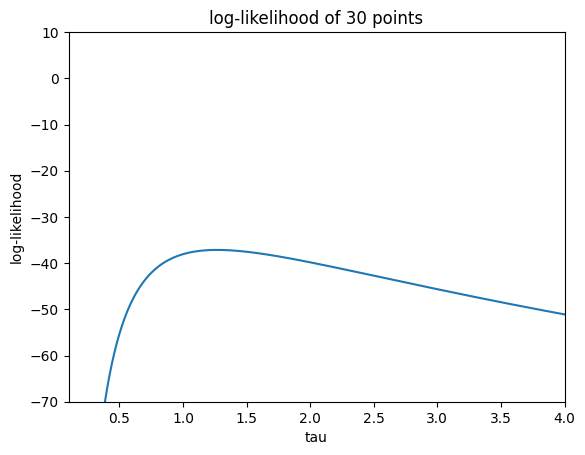

In [ ]:
# This how the log-likehood looks like after 30 datapoints
plt.plot(xgrid,np.array(likes).sum(axis=0))
plt.xlim(1e-1,4);plt.ylim(-70,10);
plt.xlabel('tau');plt.ylabel('log-likelihood');plt.title('log-likelihood of 30 points')

Text(0.5, 1.0, 'likelihood function with 30 points')

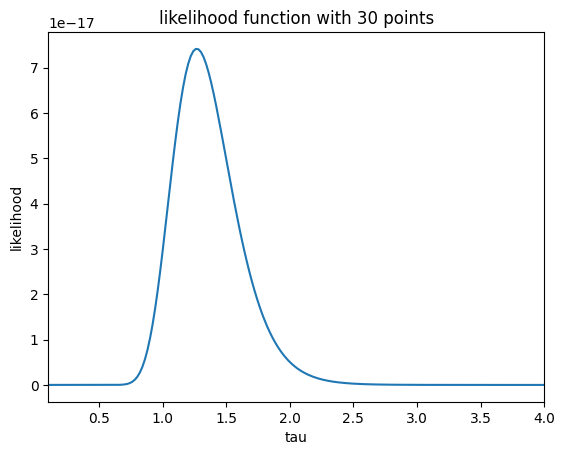

In [ ]:
# This is the likelihood after 30 points
# Notice the resemblance to the Gaussian.
plt.plot(xgrid,np.exp(np.array(likes).sum(axis=0)))
plt.xlim(1e-1,4);plt.xlabel('tau');plt.ylabel('likelihood')
plt.title('likelihood function with 30 points')

Text(0.5, 1.0, 'Likelihood after 300 points')

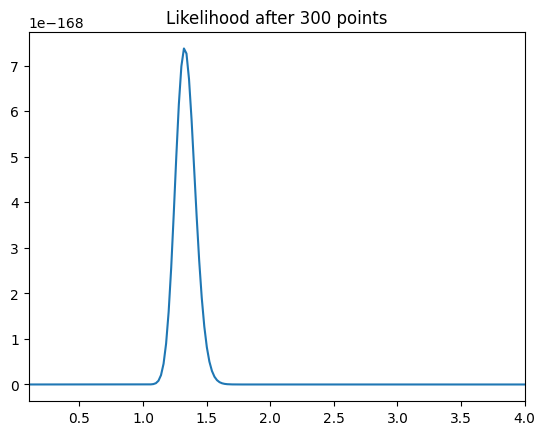

In [ ]:
likes=[]
for i in range(300):
    curlike = np.log(np.maximum(likelihood(xgrid,getOneDatum()),1e-30))
    likes.append(curlike)

# This is the likelihood after 300 points
# Notice the resemblance to the Gaussian.
plt.plot(xgrid,np.exp(np.array(likes).sum(axis=0)))
plt.xlim(1e-1, 4);plt.title('Likelihood after 300 points')

Text(0.5, 1.0, 'Log-Likelihood after 300 points')

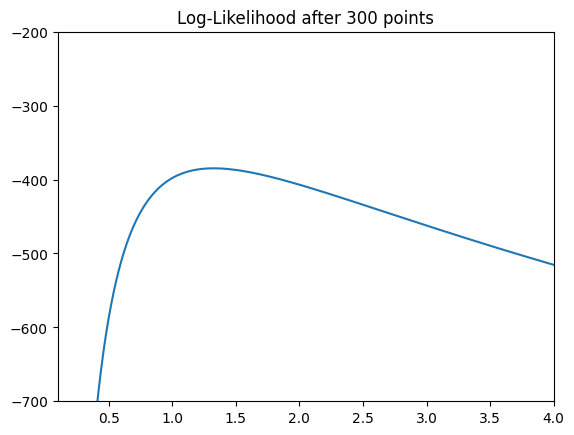

In [ ]:
plt.plot(xgrid,(np.array(likes).sum(axis=0)))
plt.ylim(-700,-200)
plt.xlim(1e-1, 4);plt.title('Log-Likelihood after 300 points')